In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
df.head()

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [2]:
# melt function
df1 = df.melt(value_vars=["A","B","C","D"])
df1.columns = ["treatment","value"]

df1


,treatment,value
0,A,25
1,A,30
2,A,28
3,A,36
4,A,29
5,B,45
6,B,55
7,B,29
8,B,56
9,B,40


In [80]:
# pivot function
df2 = df1.pivot(columns= "treatment", values = "value")

df2.columns.name = None
df2

,A,B,C,D
0,25.0,NaN,NaN,NaN
1,30.0,NaN,NaN,NaN
2,28.0,NaN,NaN,NaN
3,36.0,NaN,NaN,NaN
4,29.0,NaN,NaN,NaN
5,NaN,45.0,NaN,NaN
6,NaN,55.0,NaN,NaN
7,NaN,29.0,NaN,NaN
8,NaN,56.0,NaN,NaN
9,NaN,40.0,NaN,NaN


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='treatment', ylabel='value'>

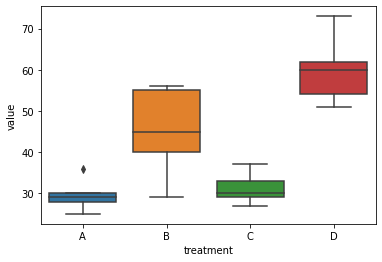

In [74]:
sns.boxplot(x = "treatment", y = "value", data=df1)

<AxesSubplot:title={'center':'value'}, xlabel='[treatment]'>

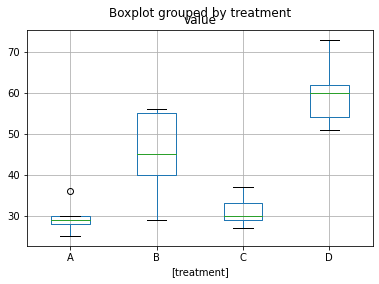

In [75]:
#pandas自己的作图工具
df1.boxplot(by= "treatment")

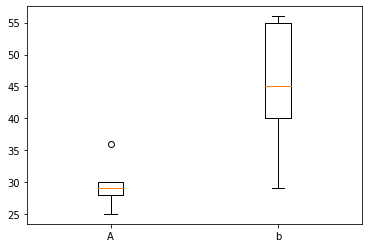

In [14]:
#matplotlib
plt.boxplot( [df1.value[df1.treatment=='A'],df1.value[df1.treatment=='B'] ],labels=["A",'b'] )

plt.show()

In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
model1 = ols('value ~ C(treatment)', data = df1).fit()


In [12]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     17.49
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           2.64e-05
Time:                        21:30:18   Log-Likelihood:                -66.643
No. Observations:                  20   AIC:                             141.3
Df Residuals:                      16   BIC:                             145.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            29.6000      3.387      8.738      0.000      22.419      36.781
C(treatment)[T.B]    15.4000      4.791      3.215      0.005       5.244      25.556
C(treatment)[T.C]     1.6000      4.791      0.334      0.743      -8.556      11.756
C(treatment)[T.D]    30.4000      4.791      6.346      0.000      20.244      40.556
==============================================================================
Omnibus:                        0.549   Durbin-Watson:                   2.629
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.020
Skew:                          -0.057   Prob(JB):                        0.990
Kurtosis:                       3.105   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
sm.stats.anova_lm(model1)

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN
